## Imports

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

* Helper Functions

In [2]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # TODO


def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    # TODO
    
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)
    # TODO


def region_of_interest(img, vertices):
    mask = np.zeros(img.shape, img.dtype)
    cv2.fillPoly(mask, vertices, (255, 255, 255))
    return cv2.bitwise_and(img, mask)
    # TODO


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    return cv2.HoughLinesP(img, rho, theta, threshold, minLineLength=min_line_len, maxLineGap=max_line_gap)
    # TODO


def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
    return cv2.addWeighted(initial_img, α, img, β, γ)
    # TODO


In [3]:
def lane_finding(image, line_color):
    # Gray scale Image
    gray = grayscale(image)
    
    # Gaussian smoothing
    kernel_size = 5
    blur_gray = gaussian_blur(gray, kernel_size)
    
    # Canny transform
    low_threshold = 50
    high_threshold = 150    
    edges = canny(blur_gray, low_threshold, high_threshold)
    
    # Select ROI
    vertices = np.array([[(50, image.shape[0]), 
                          (image.shape[1]/2 - 45, image.shape[0]/2 + 60), 
                          (image.shape[1]/2 + 45, image.shape[0]/2 + 60), 
                          (image.shape[1]-50, image.shape[0])]], dtype=np.int32)
    
    masked_edges = region_of_interest(edges, vertices)
    
    # Hough Transform
    rho = 1
    theta = np.pi/180
    threshold = 30
    min_line_len = 40
    max_line_gap = 20
    
    lines = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    
    color_edges = np.dstack((masked_edges, masked_edges, masked_edges))
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(color_edges, (x1,y1), (x2, y2), line_color, 7)
            
    # Draw the line on the original image
    result_image = weighted_img(color_edges, image)
        
    return result_image

* Test on "test_image/*.jpg"

In [4]:
import os
os.listdir("./test_images")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

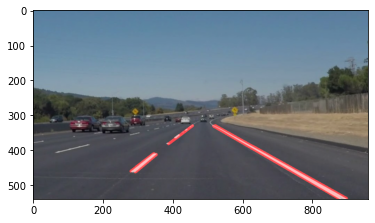

In [5]:
solidWhiteCurve = mpimg.imread('./test_images/solidWhiteCurve.jpg')
result = lane_finding(solidWhiteCurve, (255, 0, 0))
plt.imshow(result)

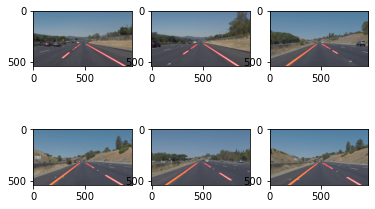

In [6]:
import glob

test_images = glob.glob("./test_images/*.jpg")

for i, test_image in enumerate(test_images):
    image = mpimg.imread(test_image)
    result = lane_finding(image, (255, 0, 0))
    plt.subplot(2, 3, i+1)
    plt.imshow(result)
#     mpimg.imsave('./test_images_output/'+"result"+str(i+1)+'.jpg')

* Test on "test_videos/*.mp4"

In [7]:
cap = cv2.VideoCapture('./test_videos/solidWhiteRight.mp4')

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = frame_width, frame_height

fourcc = cv2.VideoWriter_fourcc(*"XVID")
fps = 20

out = cv2.VideoWriter('./test_videos/solidWhiteRight_result.mp4', 
                      fourcc, fps, frame_size)

while True:
    # TODO : read frame, process pipeline
    ret, frame = cap.read()
    if not ret:
        break

    line_frame = lane_finding(frame, (0, 0, 255))
    out.write(line_frame)
    
    cv2.imshow('line_frame', line_frame)
    
    if cv2.waitKey(fps) == 27: #ESC
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()